[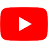](https://www.youtube.com/watch?v=uL0-6kfiH3g&t=1294s)

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('order_dataset.csv') # As it is in the same dir where python file exists there4 we don't need to specify full path
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


### Fixing the column names

In [56]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent'],
      dtype='object')

In [57]:
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

## Null values

In [58]:
df.isnull().sum().sum()

1

## Data Cleaning and handle missing values

### Distinct values in ship mode

In [59]:
df.ship_mode.unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [60]:
# df.ship_mode.value_counts()

Remove the 'not availabe','unknown','nan'

In [61]:
# Define custom null values
null_values = ["Not Available", "unknown"]

# Replace custom null values with NaN
df = df.replace(null_values, pd.NA)

df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


### Drop the rows with null values

In [62]:
df.dropna(inplace=True)

### Add new column Discount,sales,profit

In [63]:
df['discount'] = df['list_price']*df['discount_percent']/100

In [64]:
# df['sales'] = df['list_price']*df['quantity']

In [65]:
df['sales_price'] = df['list_price']-df['discount']
df['profit'] = df['sales_price']-df['cost_price']

In [66]:
df['sales'] = df['sales_price']*df['quantity']

In [67]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sales_price,profit,sales
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8,509.6
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1,2124.3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5,19.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8,4704.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0,38.0


In [68]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent', 'discount', 'sales_price', 'profit', 'sales'],
      dtype='object')

### Rearrange the column names

In [69]:
# # Sample DataFrame columns
# columns = df.columns.tolist()

# # Ensure `order_id` and `order_date` are first, followed by the rest in alphabetical order
# ordered_columns = ['order_id', 'order_date'] + sorted([col for col in columns if col not in ['order_id', 'order_date']])

# # Reorder the DataFrame columns
# # df = df[ordered_columns]
# df.head()

In [70]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'cost_price', 'list_price', 'quantity',
       'discount_percent', 'discount', 'sales_price', 'profit', 'sales'],
      dtype='object')

### Drop cost_price, list_price, discount_percent

In [71]:
df.drop(columns=['cost_price','list_price','discount_percent'],inplace=True)

### Convert the data type of order_date to date time object

In [72]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [73]:
df.dtypes

order_id                 int64
order_date      datetime64[ns]
ship_mode               object
segment                 object
country                 object
city                    object
state                   object
postal_code              int64
region                  object
category                object
sub_category            object
product_id              object
quantity                 int64
discount               float64
sales_price            float64
profit                 float64
sales                  float64
dtype: object

# Questions 

### Find the top 10 highest revenue generating products

In [74]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'quantity', 'discount', 'sales_price', 'profit', 'sales'],
      dtype='object')

In [75]:
# df.head()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9988 non-null   int64         
 1   order_date    9988 non-null   datetime64[ns]
 2   ship_mode     9988 non-null   object        
 3   segment       9988 non-null   object        
 4   country       9988 non-null   object        
 5   city          9988 non-null   object        
 6   state         9988 non-null   object        
 7   postal_code   9988 non-null   int64         
 8   region        9988 non-null   object        
 9   category      9988 non-null   object        
 10  sub_category  9988 non-null   object        
 11  product_id    9988 non-null   object        
 12  quantity      9988 non-null   int64         
 13  discount      9988 non-null   float64       
 14  sales_price   9988 non-null   float64       
 15  profit        9988 non-null   float64      

In [77]:
temp = df.groupby('sub_category')['sales'].sum(numeric_only=True).sort_values(ascending=False).head(10)
top_products = pd.DataFrame(temp).reset_index()
top_products.head(2)

,sub_category,sales
0,Chairs,1604415.7
1,Phones,1565047.7


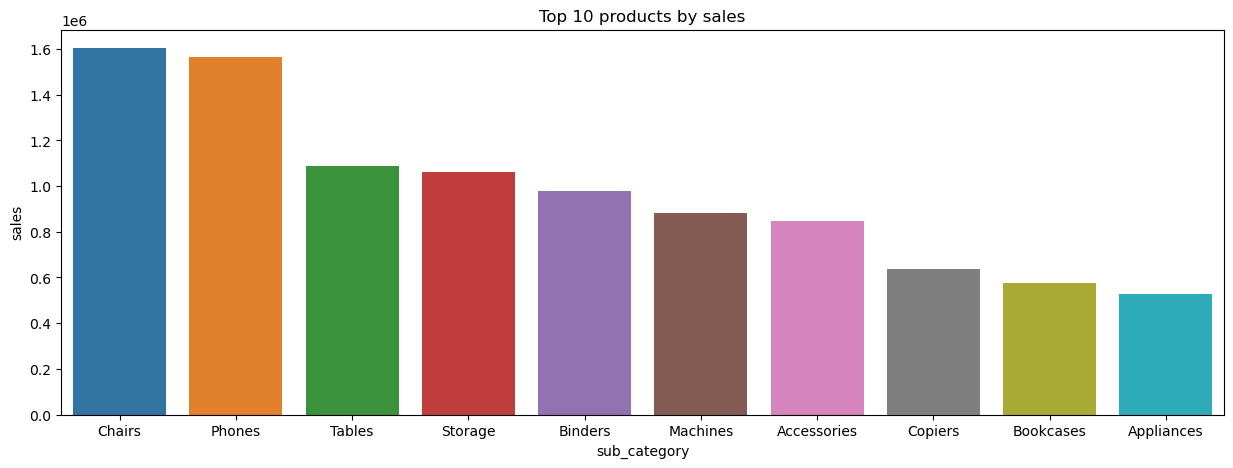

In [78]:
plt.figure(figsize=(15,5))
plt.title('Top 10 products by sales')
sns.barplot(x='sub_category',y='sales',data=top_products)
plt.show()

### Q2. Top 5 highest selling product by states

In [79]:
### Pie Chart

# sizes = top_region['sales']
# labels = top_region['state']

# # plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
# plt.show()

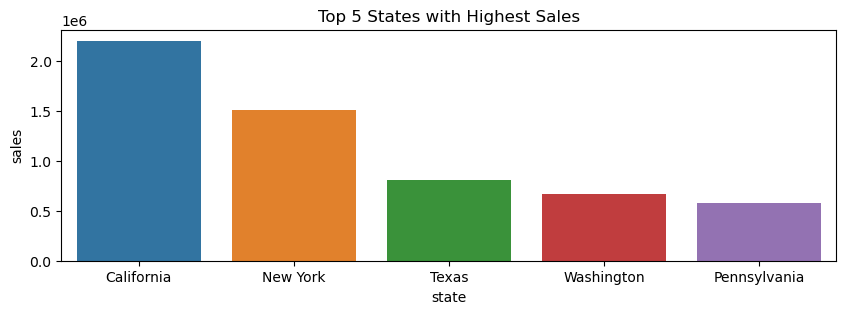

In [80]:
temp = df.groupby('state')['sales'].sum().sort_values(ascending=False).head(5)
top_region = pd.DataFrame(temp).reset_index()
top_region.head()

plt.figure(figsize=(10, 3))
sns.barplot(x='state',y='sales',data=top_region)
plt.title('Top 5 States with Highest Sales')
plt.show()

### Q3. Find month over month growth comparision for 2022 and 2023 sales eg jan2022 vs jan 2023

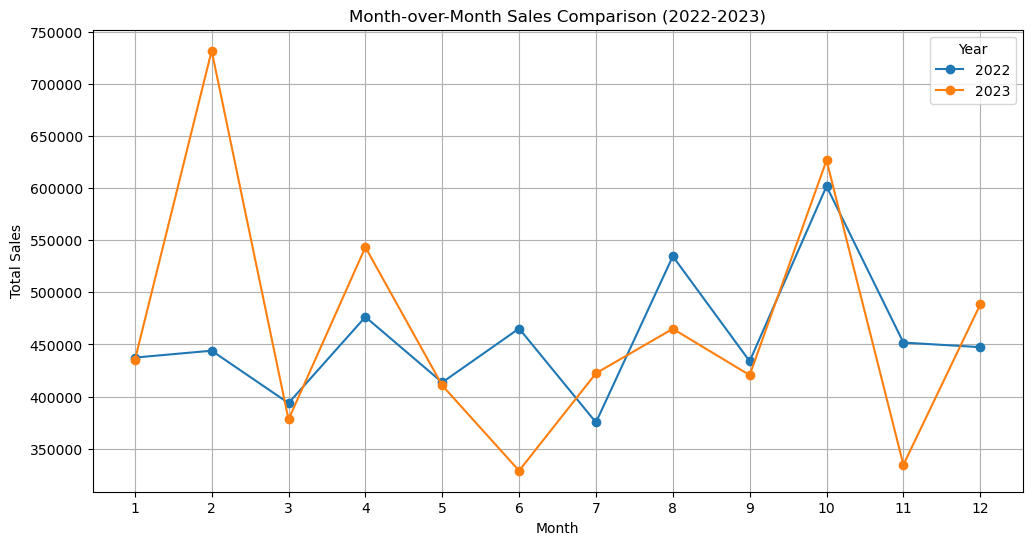

In [81]:
# Ensure 'order_date' is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data for the years 2022, 2023, and 2024
df_filtered = df[df['order_date'].dt.year.isin([2022, 2023])]

# Extract year and month, then group by them and sum sales
df_filtered['Year'] = df_filtered['order_date'].dt.year
df_filtered['Month'] = df_filtered['order_date'].dt.month
monthly_sales = df_filtered.groupby(['Year', 'Month'])['sales'].sum().unstack(level=0)
monthly_sales.head()

# Plotting the data
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', ax=plt.gca())

plt.title("Month-over-Month Sales Comparison (2022-2023)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))

plt.legend(title='Year')
plt.grid(True)
plt.show()

### Q3. Top 5 highest selling category in each region

In [82]:
# Sort by 'region' and 'sales' in descending order
df_sorted = df.sort_values(by=['region', 'sales'], ascending=[True, False])

# Group by 'region' and use head(5) to get the top 5 for each region
top_5_per_region = df_sorted.groupby('region').head(5)

top_5_per_region.head()


,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sales_price,profit,sales
9039,9040,2023-02-25,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,OFF-BI-10000545,13,494.5,9395.5,985.5,122141.5
6826,6827,2022-08-14,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,TEC-CO-10004722,5,525.0,16975.0,2975.0,84875.0
165,166,2022-10-16,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,TEC-MA-10000822,8,326.4,7833.6,983.6,62668.8
4098,4099,2023-02-27,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,OFF-BI-10001120,5,189.0,9261.0,851.0,46305.0
8990,8991,2023-09-14,Standard Class,Corporate,United States,Springfield,Missouri,65807,Central,Technology,Copiers,TEC-CO-10003763,7,147.0,4753.0,393.0,33271.0


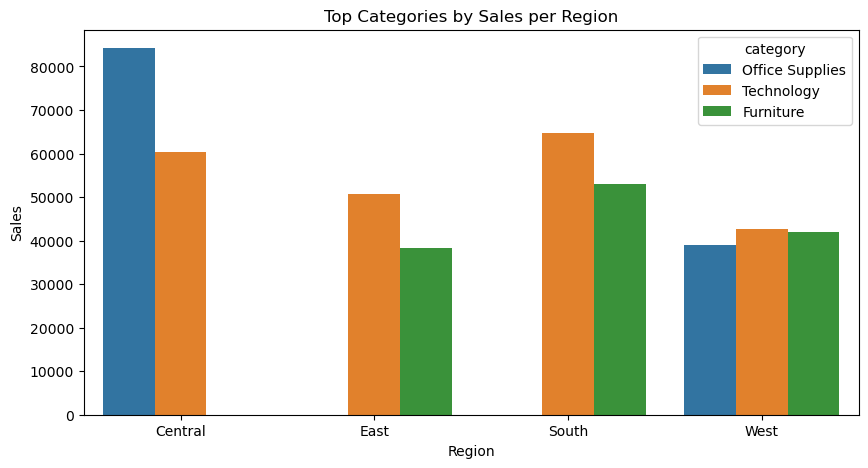

In [95]:
plt.figure(figsize=(10, 5))
sns.barplot(x='region',y='sales',data=top_5_per_region,hue='category',errorbar=None )

plt.title('Top Categories by Sales per Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

### Q4. For each category which month had highest sale?

In [84]:
# df.columns

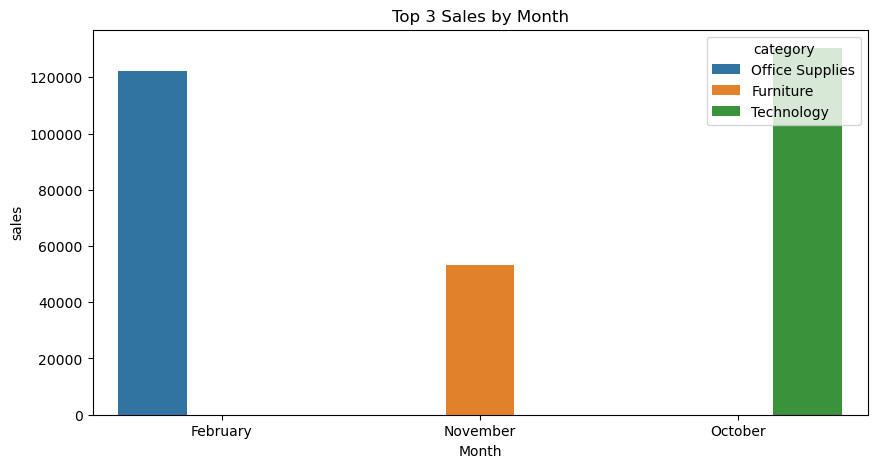

In [90]:
df_temp = df[['category','sales']].copy()
df_temp['month'] = df['order_date'].dt.month_name()
df_temp = df_temp.sort_values(by=['category','sales'],ascending=[True,False])
month_top_saler = df_temp.groupby('category').head(1)

month_top_saler = pd.DataFrame(month_top_saler).sort_values('month').reset_index(drop=True)

month_top_saler

## Data Visualisation
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='month',y='sales',data=month_top_saler,hue='category',errorbar=None )
plt.title('Top 3 Sales by Month')
plt.xlabel('Month')


plt.show()